# 1. Importing the dependencies


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib_venn import venn2
from scipy.spatial import distance

# 2. Importing the dataset

In [3]:
df = pd.read_csv("data/dataset.csv", index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# 3. Data cleaning

## How many rows and columns are in the dataset

In [4]:
df.shape

(114000, 20)

In [5]:
nrows, ncols = df.shape
print(f"Dataset has {nrows} rows and {ncols} columns")

Dataset has 114000 rows and 20 columns


## Are there any dupilcated datapoints

In [6]:
df.duplicated().sum()

450

In [7]:
df = df.drop_duplicates()
df.shape

(113550, 20)

## Current datatype of each column

In [8]:
df.dtypes.to_frame("Data Type")

,Data Type
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64


## Checking for missing values in each row

In [9]:
# checking for null values
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

One null value in artists, album_name, and track_name

In [10]:
df[df["album_name"].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [11]:
# dropping the null value
df.dropna(inplace=True)
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# 4. EDA

## Data Distrubtion

In [12]:
# numerical columns
numerical_cols = df[df.columns[(df.dtypes == "float64") | (df.dtypes == "int64")]]
numerical_cols.shape

(113549, 14)

In [13]:
numerical_cols.sample(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
23274,58,135499,0.777,0.827,5,-4.575,0,0.0453,0.00549,0.012700,0.2140,0.861,123.895,4
28642,29,219746,0.762,0.858,9,-4.589,0,0.0313,0.32100,0.062900,0.2760,0.836,126.005,4
37637,45,273882,0.677,0.609,11,-5.567,1,0.0562,0.67000,0.000000,0.0707,0.661,113.206,5
82864,21,187480,0.470,0.979,11,-2.848,1,0.0834,0.00369,0.000002,0.1870,0.732,173.968,4
28951,48,299255,0.636,0.776,6,-4.019,0,0.3350,0.35900,0.001410,0.5330,0.257,120.019,4


In [14]:
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113549 non-null  int64  
 1   duration_ms       113549 non-null  int64  
 2   danceability      113549 non-null  float64
 3   energy            113549 non-null  float64
 4   key               113549 non-null  int64  
 5   loudness          113549 non-null  float64
 6   mode              113549 non-null  int64  
 7   speechiness       113549 non-null  float64
 8   acousticness      113549 non-null  float64
 9   instrumentalness  113549 non-null  float64
 10  liveness          113549 non-null  float64
 11  valence           113549 non-null  float64
 12  tempo             113549 non-null  float64
 13  time_signature    113549 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


In [15]:
dist_numerical_cols = numerical_cols.describe().T[["min", "max", "std", "mean"]]
dist_numerical_cols["Missing Values"] = numerical_cols.isnull().sum()
dist_numerical_cols["Missing Percentage"] = (
    numerical_cols.isnull().mean() * 100
).round(2)
dist_numerical_cols.loc["key", "Missing Values"] = (df["key"] == -1).sum()
dist_numerical_cols

,min,max,std,mean,Missing Values,Missing Percentage
popularity,0.000,100.000,22.283855,33.324433,0,0.0
duration_ms,8586.000,5237295.000,106413.098525,228081.370844,0,0.0
danceability,0.000,0.985,0.173409,0.567031,0,0.0
energy,0.000,1.000,0.251053,0.642091,0,0.0
key,0.000,11.000,3.560147,5.309452,0,0.0
loudness,-49.531,4.532,5.011422,-8.243408,0,0.0
mode,0.000,1.000,0.480620,0.637866,0,0.0
speechiness,0.000,0.965,0.105762,0.084674,0,0.0
acousticness,0.000,0.996,0.331906,0.314064,0,0.0
instrumentalness,0.000,1.000,0.309217,0.155703,0,0.0


In [16]:
numerical_cols.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## Distribution of the numerical columns

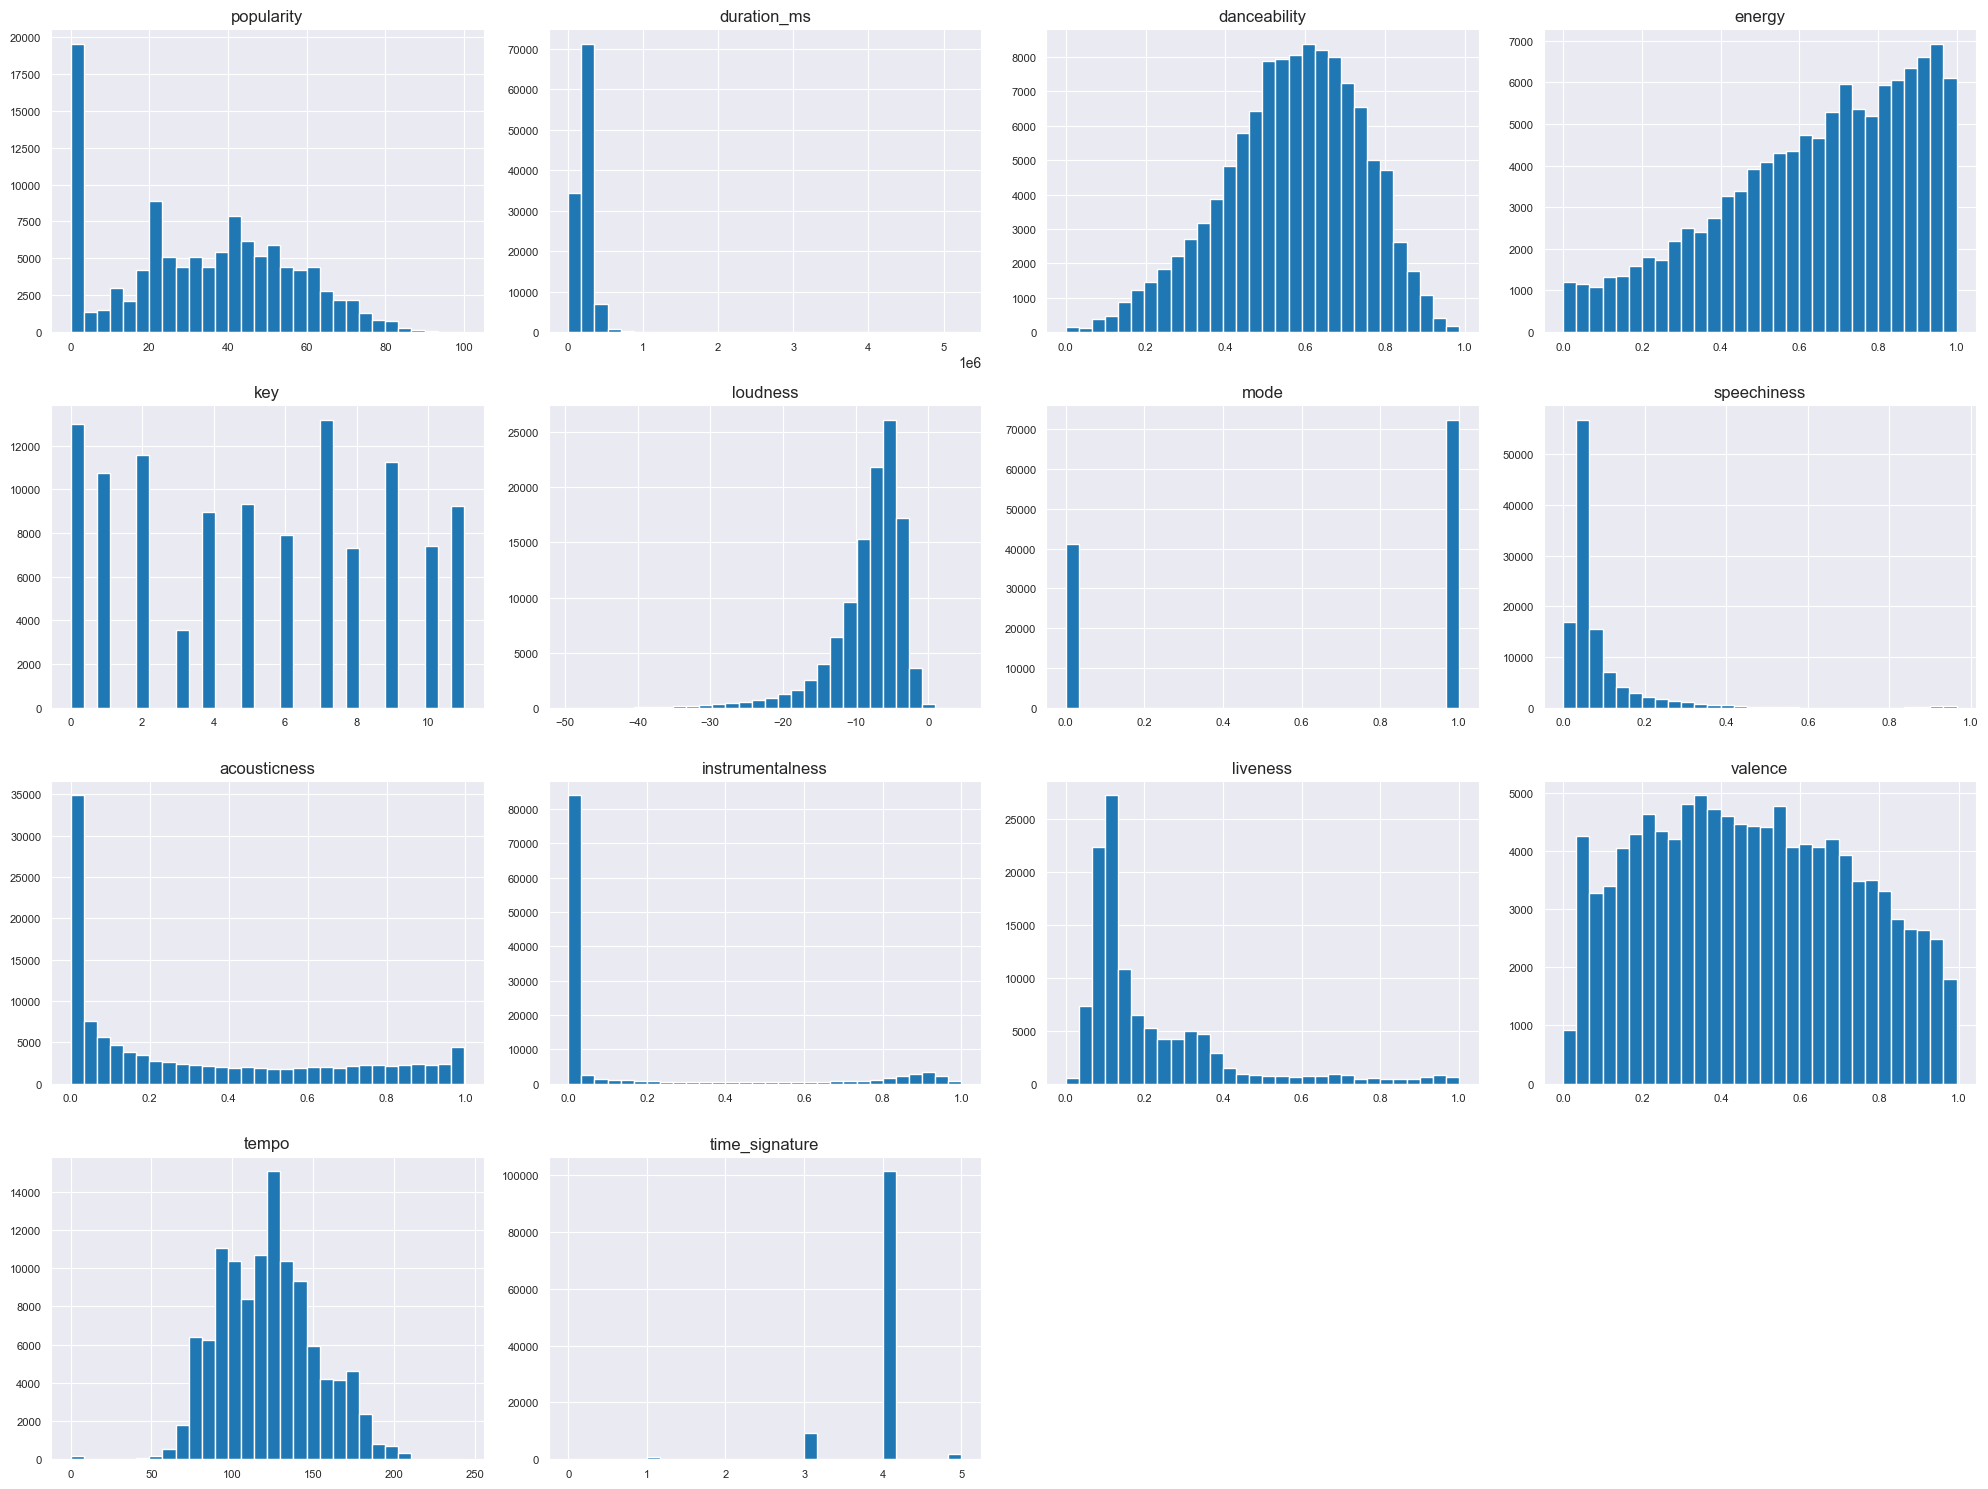

In [17]:
sns.set_style("darkgrid")
numerical_cols.hist(figsize=(20, 15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

* Danceability, valence and tempo have a close to normal distribution 
* Loudness has a let skew with most songs being between -5 to -5 db
* Speechiness, liveness, acoustiness and instrumentalness have a most right skew
* A lot of songs have a popularity of zero but the rest largely follow a normal distribution 
* Energy has an increasing distribution with values from 0 - 1
* The key column has mainly discrete values with a fairly random distribution 
* The mode column has only two values, 0 or 1, with more songs having a major mode (1) than a minor mode (0)


## Distribution of categorical columns

In [18]:
categorical_cols = df[df.columns[(df.dtypes == "object") | (df.dtypes == "bool")]]
categorical_cols.shape

(113549, 6)

In [19]:
categorical_cols.sample(5)

,track_id,artists,album_name,track_name,explicit,track_genre
83940,3HAzRRDlXJJPySg2r3cRlY,Simon Doty,Journey To ABGT500 pt.2,Living Sound (ABGT499D3),False,progressive-house
19401,1yTTMcUhL7rtz08Dsgb7Qb,Maren Morris;Hozier,The Bones (with Hozier),The Bones - with Hozier,False,country
20695,4VDAAeMGq6AQZi1GzO8SQS,Robin Schulz;Alida,Cardio Tracks,In Your Eyes,False,dance
18687,29Ix5oCICnAYsiV7UtKFDZ,Baron Vaughn,Holy Fuck. Live Comedy.,Baron Vaughn,True,comedy
29067,144VylfhBHydi2xvqy9yw6,Krewella;Far Out,Alibi & Runaway (Remixes),Alibi (Far Out Remix),False,dubstep


In [20]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     113549 non-null  object
 1   artists      113549 non-null  object
 2   album_name   113549 non-null  object
 3   track_name   113549 non-null  object
 4   explicit     113549 non-null  bool  
 5   track_genre  113549 non-null  object
dtypes: bool(1), object(5)
memory usage: 5.3+ MB


In [21]:
dist_categorical_cols = categorical_cols.describe()
dist_categorical_cols["Missing values"] = categorical_cols.isnull().sum()
dist_categorical_cols["Percentage Missing"] = categorical_cols.isnull().mean() * 100
dist_categorical_cols

,track_id,artists,album_name,track_name,explicit,track_genre,Missing values,Percentage Missing
count,113549,113549,113549,113549,113549,113549,NaN,NaN
unique,89740,31437,46589,73608,2,114,NaN,NaN
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic,NaN,NaN
freq,9,279,195,151,103831,1000,NaN,NaN


No missing values

In [22]:
categorical_cols.describe()

,track_id,artists,album_name,track_name,explicit,track_genre
count,113549,113549,113549,113549,113549,113549
unique,89740,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,103831,1000


1. Some tracks occur more than once as count is greater than unique
2. The beatles are the most frequently appearing artists
3. The most frequently occuring album is 'Alternative Christmass 2022'
4. The most frequently occuring track_name is 'Run Rudolph run'
5. Most tracks are not explicit
6. The most frequently occuring genre is 'Acoustic'


## Distribution of Categorical data

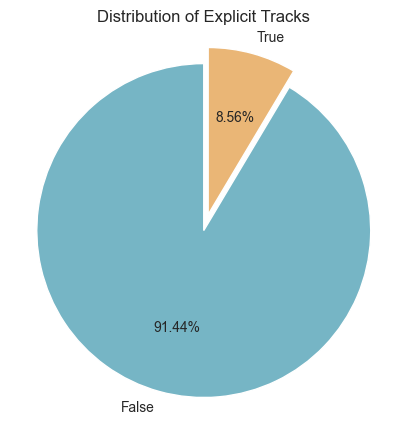

In [23]:
# Explicit or not
unique_values, value_counts = np.unique(
    categorical_cols["explicit"], return_counts=True
)
fig, ax = plt.subplots(figsize=(5, 5))
explode = [0, 0.1]
colors = ["#76b5c5", "#eab676"]

ax.pie(
    value_counts,
    labels=unique_values,
    autopct="%1.2f%%",
    startangle=90,
    colors=colors,
    explode=explode,
)
ax.axis("equal")
ax.set_title("Distribution of Explicit Tracks")
plt.show()

Most of the tracks do not have explicit content

## Top Artist, album_name, track_name, track_genre

/var/folders/hf/m36_zjnd0956g0q9jsxp3t1c0000gn/T/ipykernel_9287/273700082.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/hf/m36_zjnd0956g0q9jsxp3t1c0000gn/T/ipykernel_9287/273700082.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/hf/m36_zjnd0956g0q9jsxp3t1c0000gn/T/ipykernel_9287/273700082.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/hf/m36_zjnd0956g0q9jsxp3t1c0000gn/T/ipykernel_9287/273700082.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

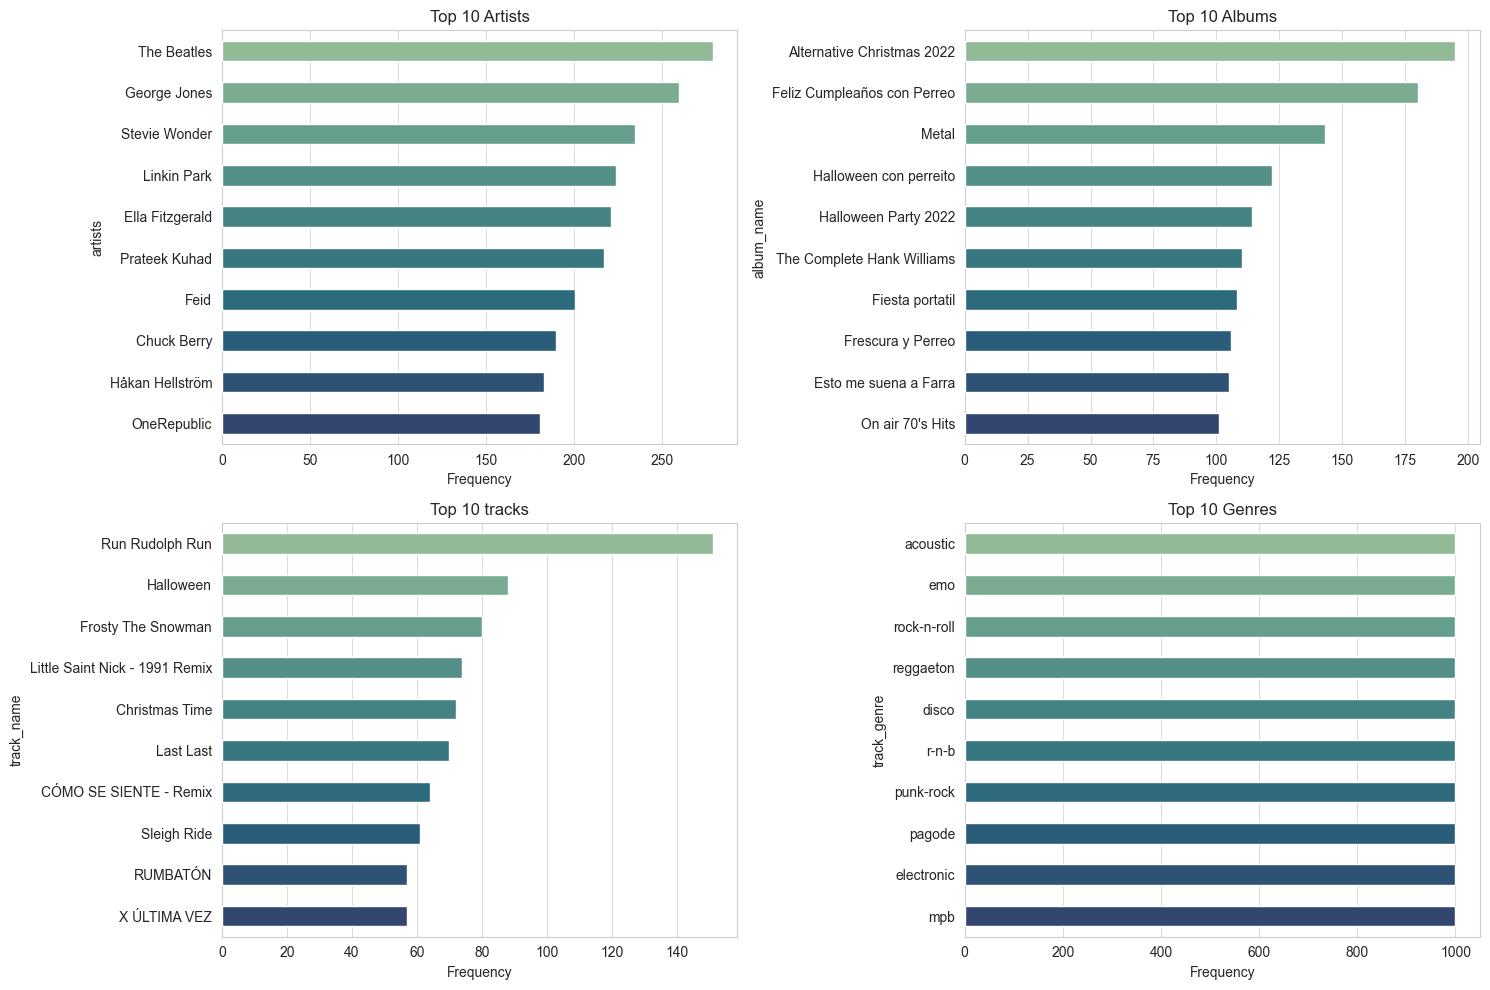

In [24]:
top_n = 10
sns.set_style("whitegrid")

top_artisits = df["artists"].value_counts().head(top_n)
top_album = df["album_name"].value_counts().head(top_n)
top_tracks = df["track_name"].value_counts().head(top_n)
top_genres = df["track_genre"].value_counts().head(top_n)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Top N Artists
sns.barplot(
    x=top_artisits.values,
    y=top_artisits.index,
    palette="crest",
    ax=axes[0, 0],
    orient="h",
    zorder=3,
    width=0.5,
)
axes[0, 0].set_title(f"Top {top_n} Artists")
axes[0, 0].set_xlabel("Frequency")
axes[0, 0].xaxis.grid(linestyle="-", linewidth=0.5, alpha=1, zorder=0)

# Top N ALbums
sns.barplot(
    x=top_album.values,
    y=top_album.index,
    palette="crest",
    ax=axes[0, 1],
    orient="h",
    zorder=3,
    width=0.5,
)
axes[0, 1].set_title(f"Top {top_n} Albums")
axes[0, 1].set_xlabel("Frequency")
axes[0, 1].xaxis.grid(linestyle="-", linewidth=0.5, alpha=1, zorder=0)

# Top N tracks
sns.barplot(
    x=top_tracks.values,
    y=top_tracks.index,
    palette="crest",
    ax=axes[1, 0],
    orient="h",
    zorder=3,
    width=0.5,
)
axes[1, 0].set_title(f"Top {top_n} tracks")
axes[1, 0].set_xlabel("Frequency")
axes[1, 0].xaxis.grid(linestyle="-", linewidth=0.5, alpha=1, zorder=0)

# Top N Genres
sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    palette="crest",
    ax=axes[1, 1],
    orient="h",
    zorder=3,
    width=0.5,
)
axes[1, 1].set_title(f"Top {top_n} Genres")
axes[1, 1].set_xlabel("Frequency")
axes[1, 1].xaxis.grid(linestyle="-", linewidth=0.5, alpha=1, zorder=0)

plt.tight_layout()
plt.show()

1. Top performing artist are the Beatles
2. Linkin park making a presence as alwyas
3. Ella fitzgerald is in there as well
4. Data was taken close to christmas so most songs are christmas themed

## Checking for outliers

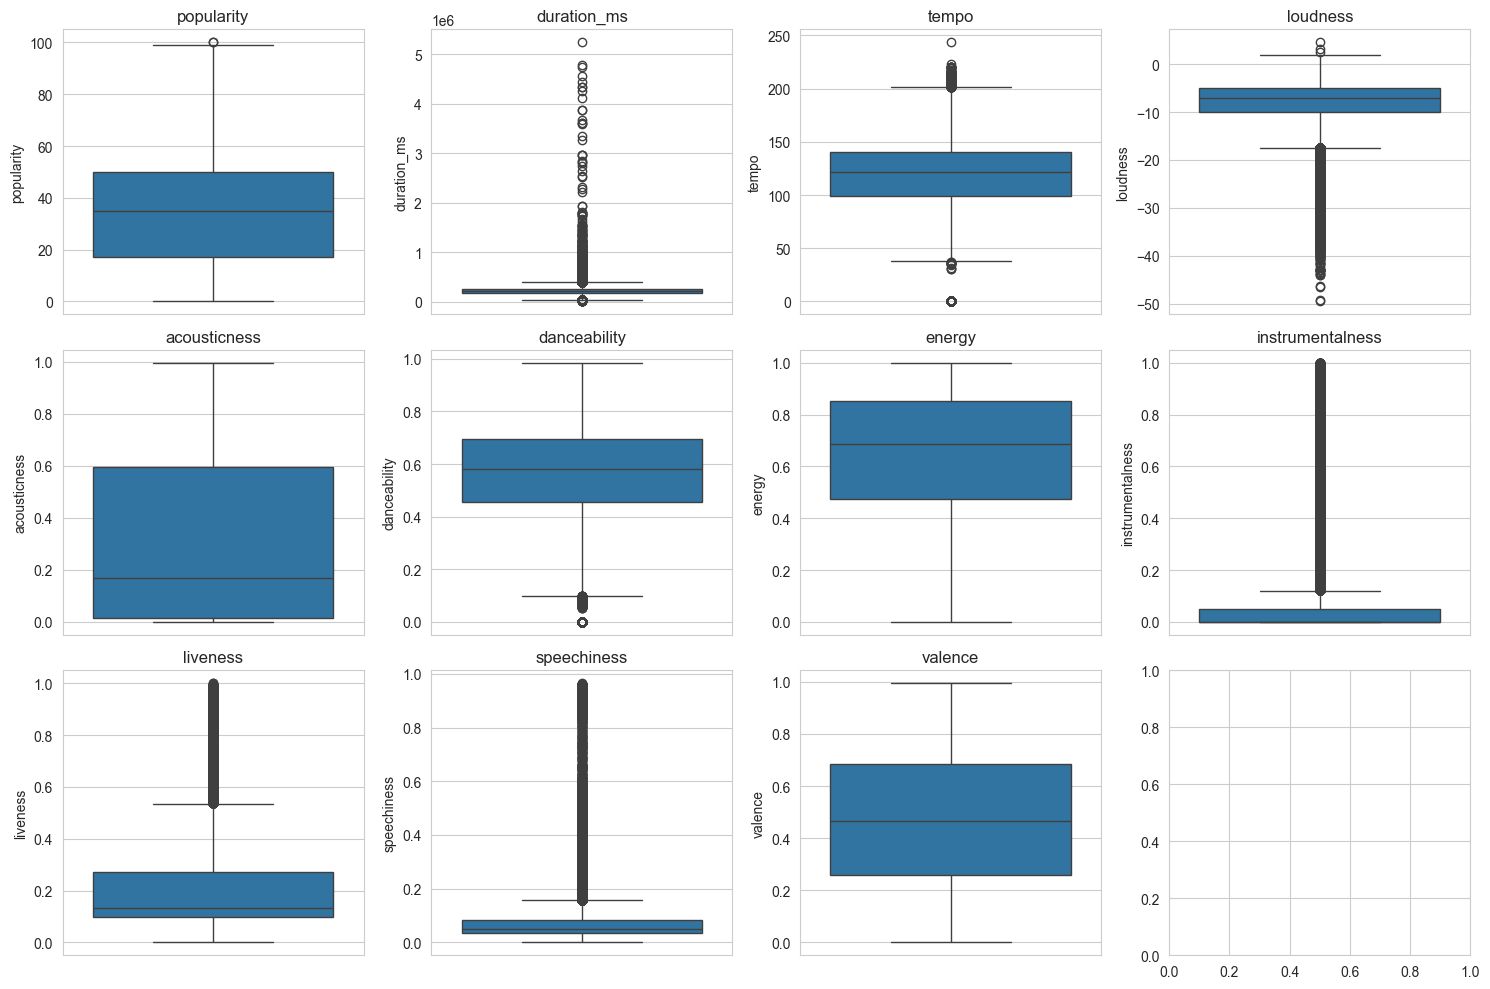

In [25]:
sns.set_style("whitegrid")

columns = [
    "popularity",
    "duration_ms",
    "tempo",
    "loudness",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "speechiness",
    "valence",
]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=numerical_cols, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(col)

plt.tight_layout()
plt.show()

In [26]:
for i in range(0, 12):
    print([i // 4, i % 4])

[0, 0]
[0, 1]
[0, 2]
[0, 3]
[1, 0]
[1, 1]
[1, 2]
[1, 3]
[2, 0]
[2, 1]
[2, 2]
[2, 3]


# Correlation between the variable

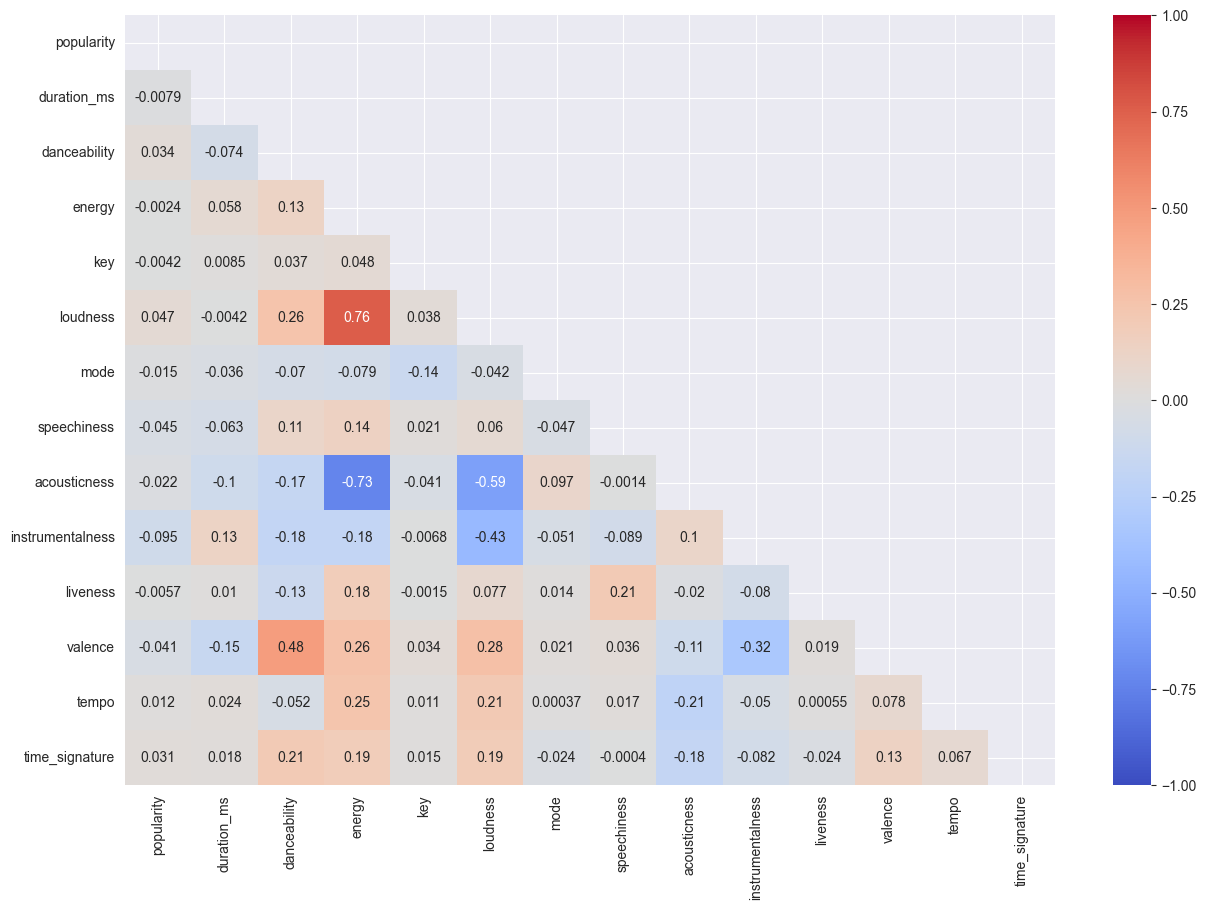

In [27]:
# heatmap for correlatoin
corr = numerical_cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

-  there is generally a low correlation between the variables across board
-  the columns with the highest correlations ara loudness and energy with 0.76, acoustics and energy with -0.73, acoustics and loudness with -0.59

# Analysing Song Genre trends and its effect of popularity

## Top 10 genres with the highest number of songs

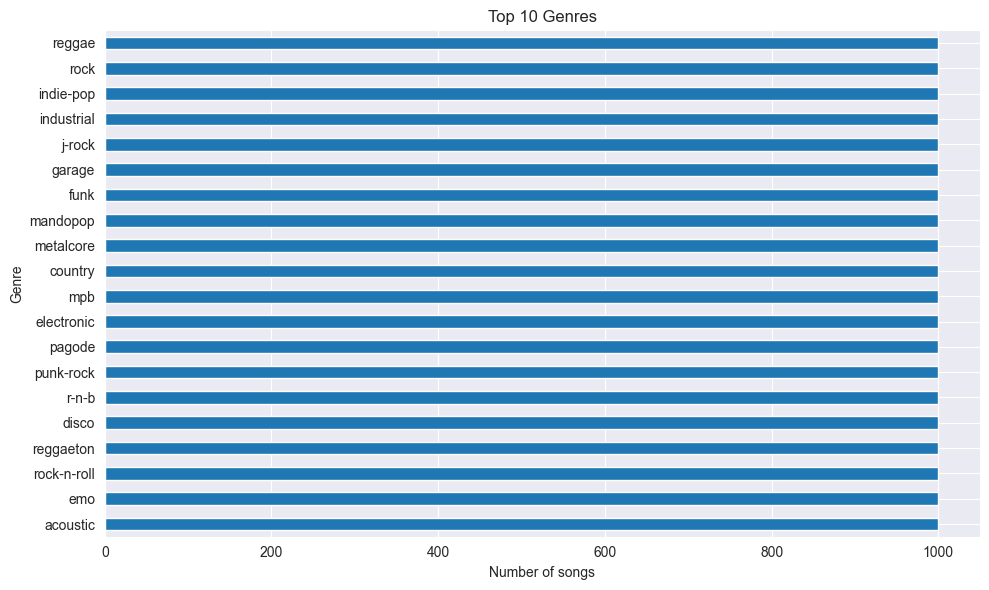

In [28]:
genre_df = df["track_genre"].value_counts()
top_10_genres = genre_df.head(20)

plt.figure(figsize=(10, 6))
top_10_genres.plot(kind="barh")
plt.title("Top 10 Genres")
plt.xlabel("Number of songs")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

## which genre has the highest average popularity score

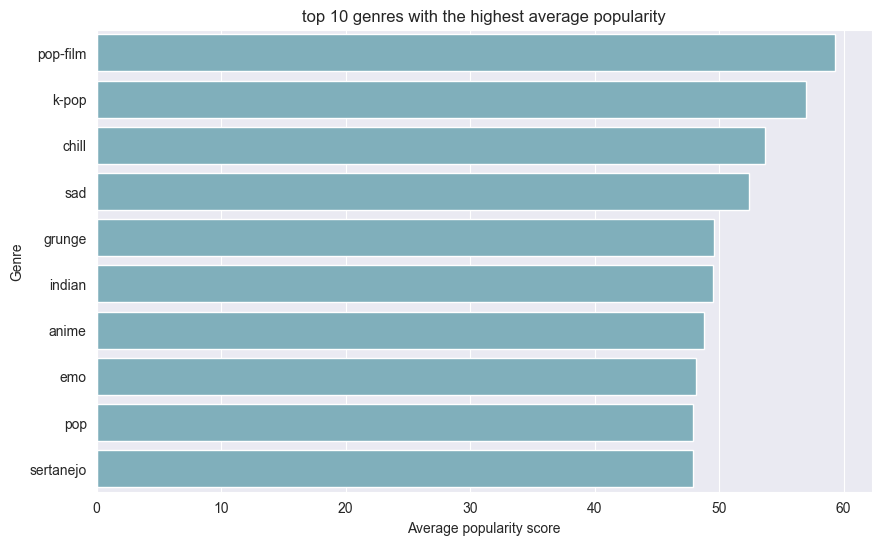

In [29]:
average_popularity_by_genre = (
    df.groupby("track_genre")["popularity"].mean().reset_index()
)
top_10_popular_genre = average_popularity_by_genre.nlargest(10, "popularity")


plt.figure(figsize=(10, 6))
sns.barplot(
    x="popularity",
    y="track_genre",
    data=top_10_popular_genre,
    color="#76b5c5",
)
plt.title("top 10 genres with the highest average popularity")
plt.xlabel("Average popularity score")
plt.ylabel("Genre")

plt.show()

## Most explicit lyrics

In [30]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


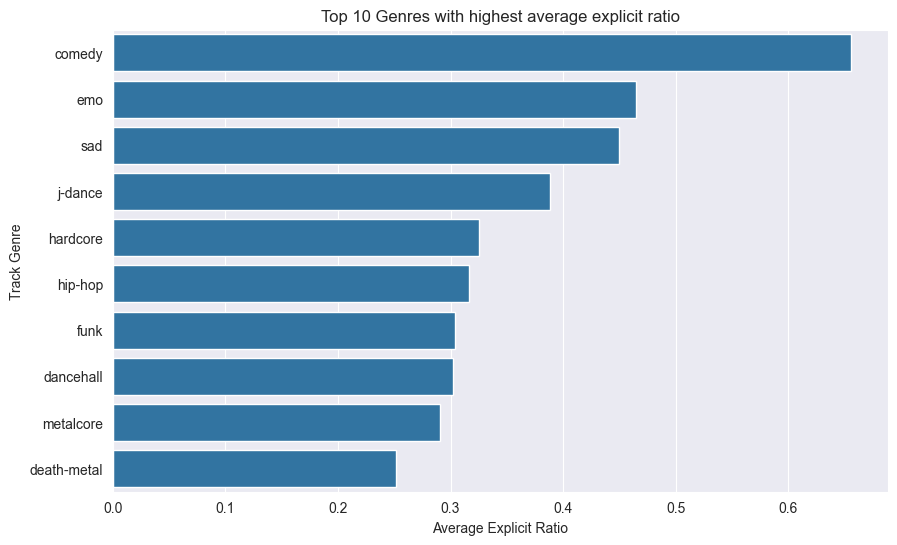

In [31]:
explicit_ratio_by_genre = df.groupby("track_genre")["explicit"].mean().reset_index()
top_10_explicit_genres = explicit_ratio_by_genre.nlargest(10, "explicit")

plt.figure(figsize=(10, 6))
sns.barplot(x="explicit", y="track_genre", data=top_10_explicit_genres)
plt.title("Top 10 Genres with highest average explicit ratio")
plt.xlabel("Average Explicit Ratio")
plt.ylabel("Track Genre")

plt.show()

* Comedy genre has the highest average explicit ratio
* Surprisingly Hip Hop is only in 7th place, with metalcore and death metal in 9 and 10th place

## Which genre has the highest number of songs in the the top 0.1% (113) most popular songs

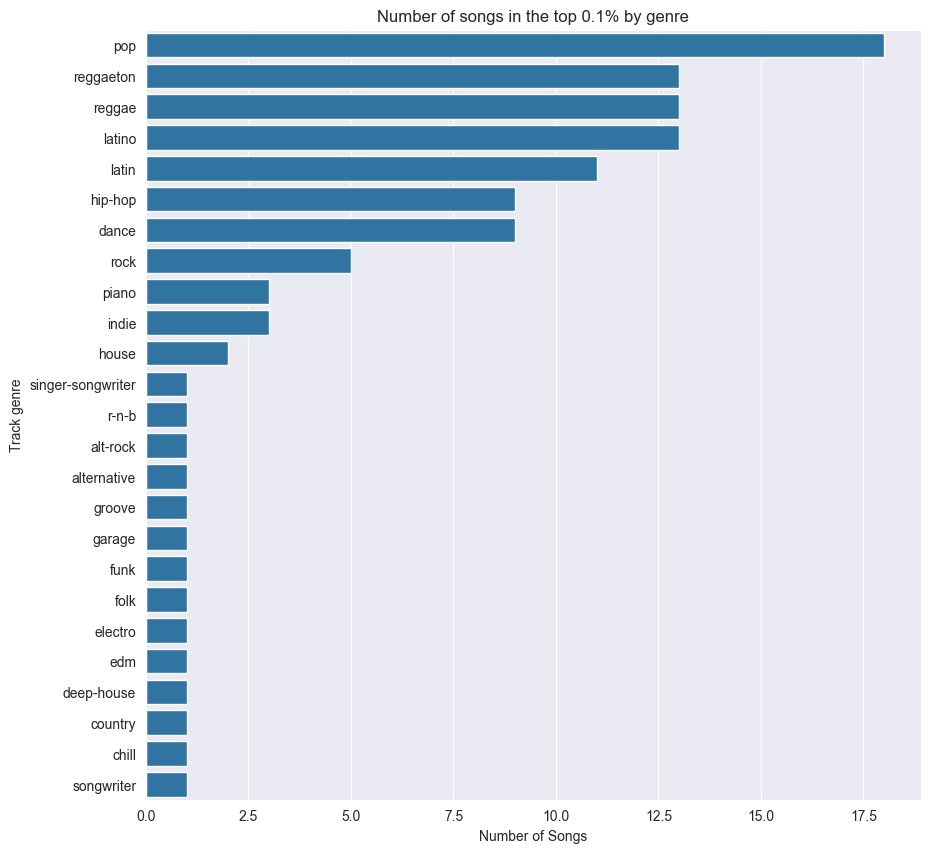

In [32]:
top_genres_in_top_percent = (
    df.nlargest(113, "popularity")
    .groupby("track_genre")
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

plt.figure(figsize=(10, 10))
sns.barplot(x="count", y="track_genre", data=top_genres_in_top_percent)
plt.title("Number of songs in the top 0.1% by genre")
plt.xlabel("Number of Songs")
plt.ylabel("Track genre")

plt.show()

## Highest percentage of live songs

In [33]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


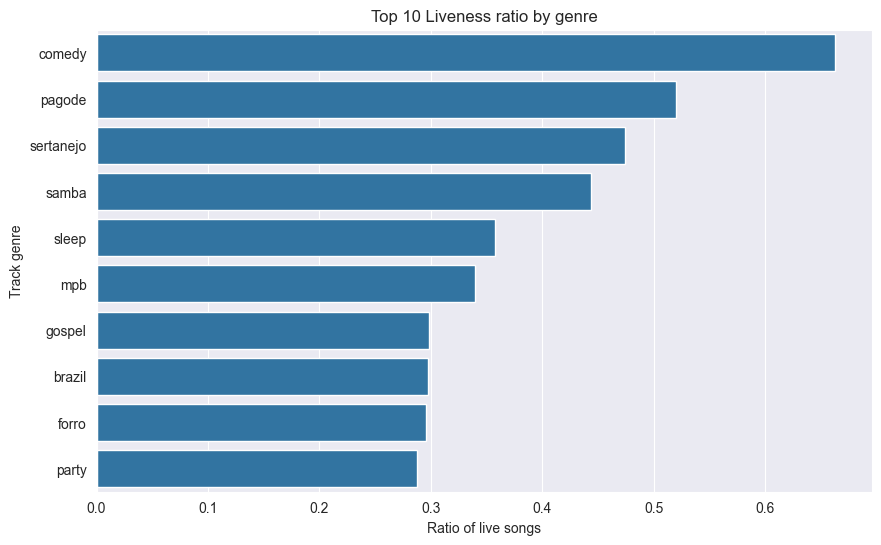

In [34]:
live_ratio_by_genre = df.groupby("track_genre")["liveness"].mean().reset_index()
top_10_live_genres = live_ratio_by_genre.nlargest(10, "liveness")

plt.figure(figsize=(10, 6))
sns.barplot(x="liveness", y="track_genre", data=top_10_live_genres)
plt.title("Top 10 Liveness ratio by genre")
plt.xlabel("Ratio of live songs")
plt.ylabel("Track genre")

plt.show()

In [35]:
most_live_genre = top_10_live_genres.loc[live_ratio_by_genre["liveness"].idxmax()]
most_live_genre

track_genre      comedy
liveness       0.662211
Name: 18, dtype: object

## Most danceable genre

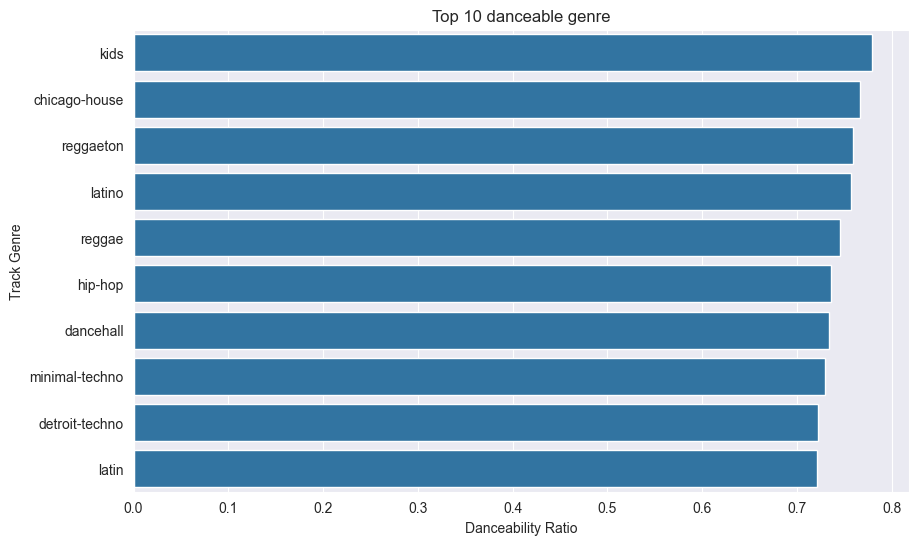

In [36]:
danceable_ratio_by_genre = (
    df.groupby("track_genre")["danceability"].mean().reset_index()
)
top_10_danceable_music = danceable_ratio_by_genre.nlargest(10, "danceability")
most_danceable_genre = top_10_danceable_music.loc[
    top_10_danceable_music["danceability"].idxmax()
]

plt.figure(figsize=(10, 6))
sns.barplot(x="danceability", y="track_genre", data=top_10_danceable_music)
plt.title("Top 10 danceable genre")
plt.xlabel("Danceability Ratio")
plt.ylabel("Track Genre")
plt.show()

In [37]:
print(
    f"the most danceable genre is {most_danceable_genre['track_genre']} with average danceability ratio of {most_danceable_genre['danceability']}"
)

the most danceable genre is kids with average danceability ratio of 0.7786296670030272


## Highest correlation between loudness and energy

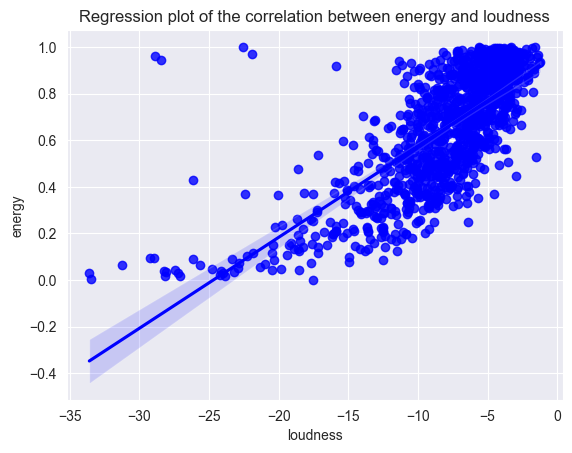

In [38]:
sample = df.sample(int(0.01 * len(df)))

sns.regplot(data=sample, y="energy", x="loudness", color="b")

plt.title("Regression plot of the correlation between energy and loudness")
plt.show()

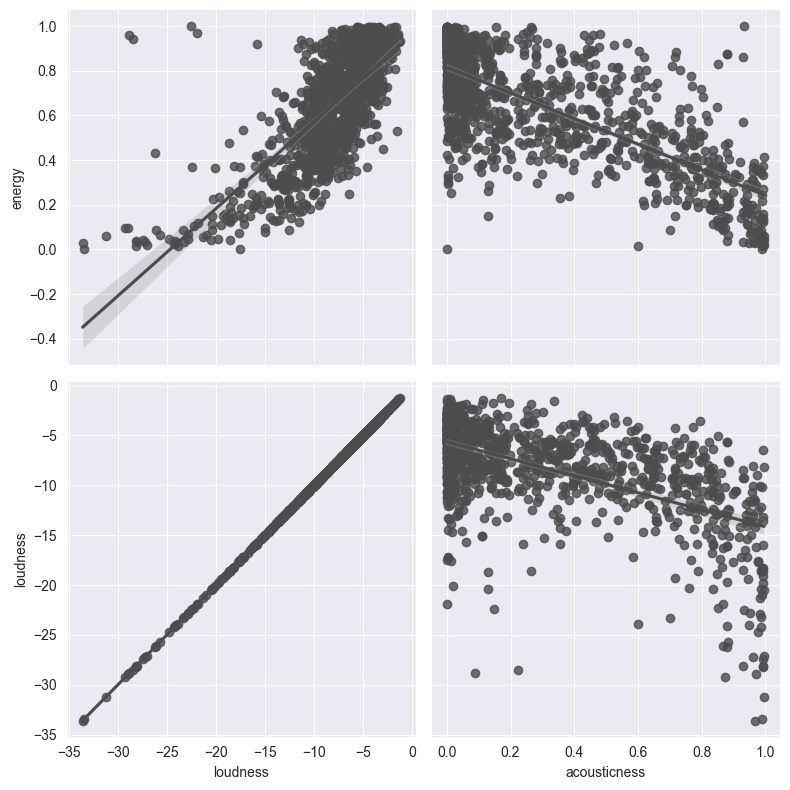

In [39]:
g = sns.PairGrid(
    sample, y_vars=["energy", "loudness"], x_vars=["loudness", "acousticness"], height=4
)
g.map(sns.regplot, color=".3")
plt.tight_layout()

## Correlation between loudness and energy in the top 3 genres with the highest average popularity

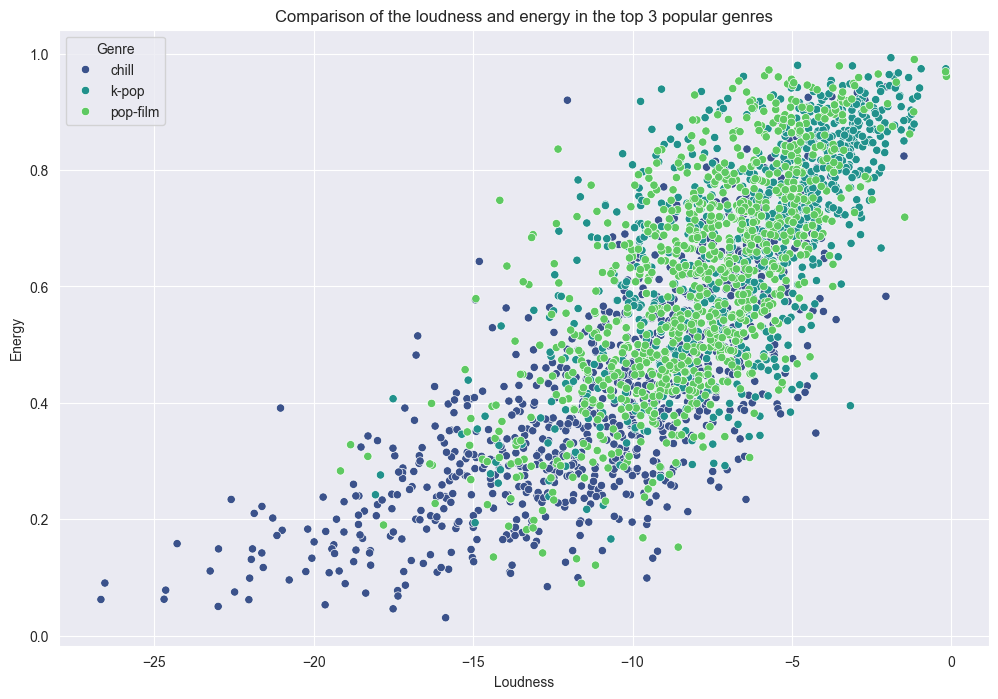

In [40]:
top_3_genres = average_popularity_by_genre.nlargest(3, "popularity")
top_3_genre_data = df[df["track_genre"].isin(top_3_genres["track_genre"])]


sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="loudness",
    y="energy",
    hue="track_genre",
    data=top_3_genre_data,
    palette="viridis",
)
plt.title("Comparison of the loudness and energy in the top 3 popular genres")
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.legend(title="Genre")
plt.show()

# Top Genres

In [41]:
top_genres = df.groupby("track_genre")["popularity"].mean()
top_genres = top_genres[top_genres >= 35].sort_values(ascending=False)
top_genres[:10]

track_genre
pop-film     59.280280
k-pop        56.963928
chill        53.704705
sad          52.379000
grunge       49.582583
indian       49.528529
anime        48.766767
emo          48.128000
pop          47.903323
sertanejo    47.866000
Name: popularity, dtype: float64

In [42]:
copy_df = df.copy()
copy_df["artists"] = copy_df["artists"].str.split(";")
copy_df = copy_df.explode("artists")
copy_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [43]:
top_artists = copy_df.groupby("artists")["popularity"].mean()
top_artists = top_artists[top_artists >= 70].sort_values(ascending=False)
top_artists[:10]

artists
Bizarrap            99.0
Quevedo             99.0
Harry Styles        92.0
Luar La L           90.5
Beach Weather       90.0
Pablo Pesadilla     88.0
Polimá Westcoast    88.0
Olivia Rodrigo      87.4
Lewis Capaldi       87.0
Yung Gravy          87.0
Name: popularity, dtype: float64

In [44]:
top_artisits = top_artists.index.tolist()
genres_artists = df[df["artists"].isin(top_artisits)]["track_genre"].unique().tolist()
genres_artists[:10]

['alt-rock',
 'alternative',
 'blues',
 'british',
 'cantopop',
 'chill',
 'country',
 'dance',
 'disco',
 'edm']

## Top Genres vs Genres of top artists

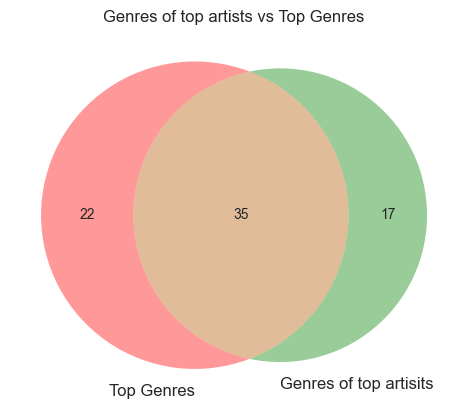

In [45]:
top_genres = top_genres.index.tolist()

venn2(
    [set(top_genres), set(genres_artists)],
    set_labels=("Top Genres", "Genres of top artisits"),
)
plt.title("Genres of top artists vs Top Genres")
plt.show()

In [46]:
top_genres_only = list(set(top_genres) - set(genres_artists))
genres_artists_only = list(set(genres_artists) - set(top_genres))
intersection = list(set(top_genres) & set(genres_artists))

top_genres_only = (
    df[df["track_genre"].isin(top_genres_only)]
    .groupby("track_genre")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

genres_artists_only = (
    df[df["track_genre"].isin(genres_artists_only)]
    .groupby("track_genre")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

intersection = (
    df[df["track_genre"].isin(intersection)]
    .groupby("track_genre")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

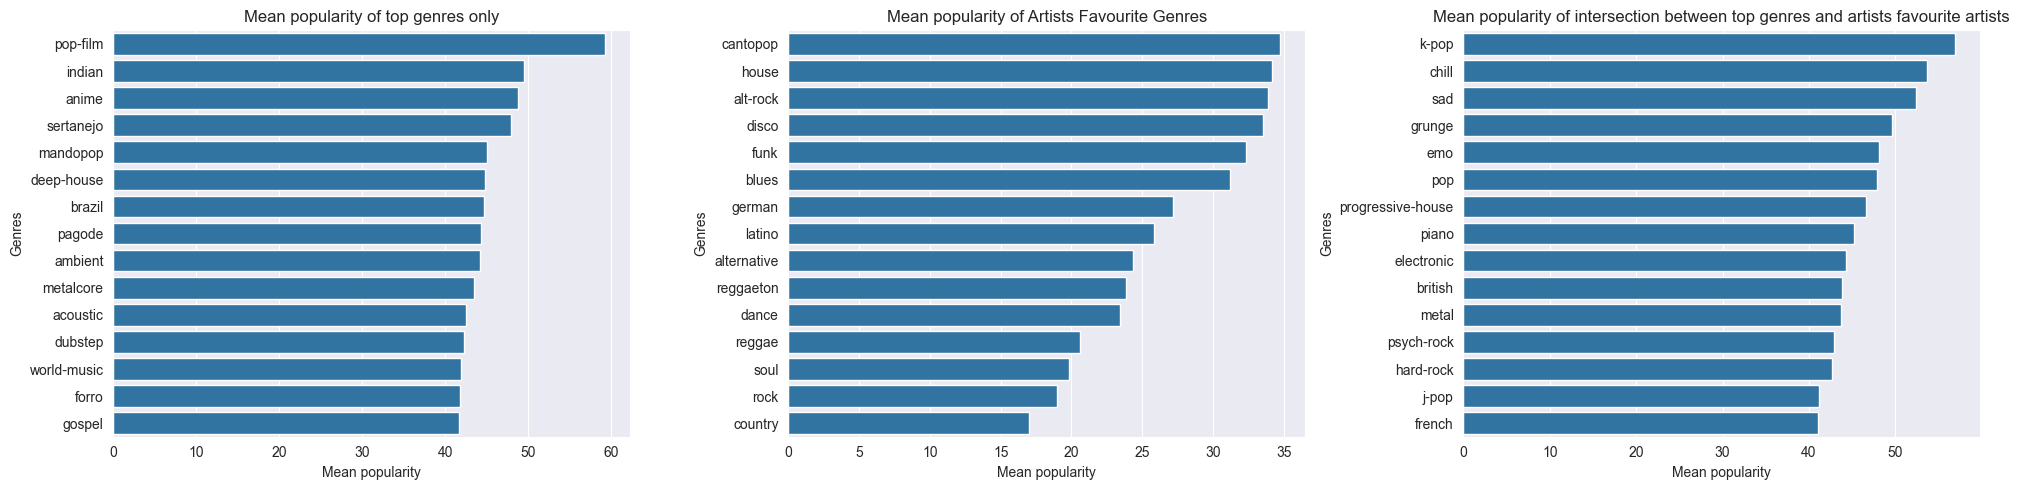

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Top genres only
sns.barplot(x=top_genres_only.values, y=top_genres_only.index, ax=axes[0])
axes[0].set_title("Mean popularity of top genres only")
axes[0].set_xlabel("Mean popularity")
axes[0].set_ylabel("Genres")

# Genres Artists only
sns.barplot(x=genres_artists_only.values, y=genres_artists_only.index, ax=axes[1])
axes[1].set_title("Mean popularity of Artists Favourite Genres")
axes[1].set_xlabel("Mean popularity")
axes[1].set_ylabel("Genres")

# GIntersection only
sns.barplot(x=intersection.values, y=intersection.index, ax=axes[2])
axes[2].set_title(
    "Mean popularity of intersection between top genres and artists favourite artists"
)
axes[2].set_xlabel("Mean popularity")
axes[2].set_ylabel("Genres")

plt.tight_layout()
plt.show()

## Distribution of number of genres

In [48]:
copy_df = df.copy()
copy_df["artists"] = copy_df["artists"].str.split(";")
copy_df = copy_df.explode("artists")

artist_genre_count = (
    copy_df.groupby("artists")["track_genre"].nunique().sort_values(ascending=False)
)

top_artists = copy_df.groupby("artists")["popularity"].mean()
top_artists = top_artists[top_artists >= 60].sort_values(ascending=False)

top_artists = top_artists.index.tolist()

copy_df = copy_df[copy_df["artists"].isin(top_artists)]

top_artists_genre_count = (
    copy_df.groupby("artists")["track_genre"].nunique().sort_values(ascending=False)
)

top_artists_genre_count

artists
blackbear           13
Halsey              13
Khalid              12
Kygo                11
Alan Walker         11
                    ..
Johnning             1
John Vincent III     1
John Smith           1
John Benitez         1
須田景凪                 1
Name: track_genre, Length: 2521, dtype: int64

In [49]:
artist_genre_count

artists
David Guetta      19
The Weeknd        18
Tiësto            18
Katy Perry        16
Skrillex          16
                  ..
JAM Project        1
JADY               1
JACKIE EXTREME     1
J9ueve             1
龍藏Ryuzo            1
Name: track_genre, Length: 29859, dtype: int64

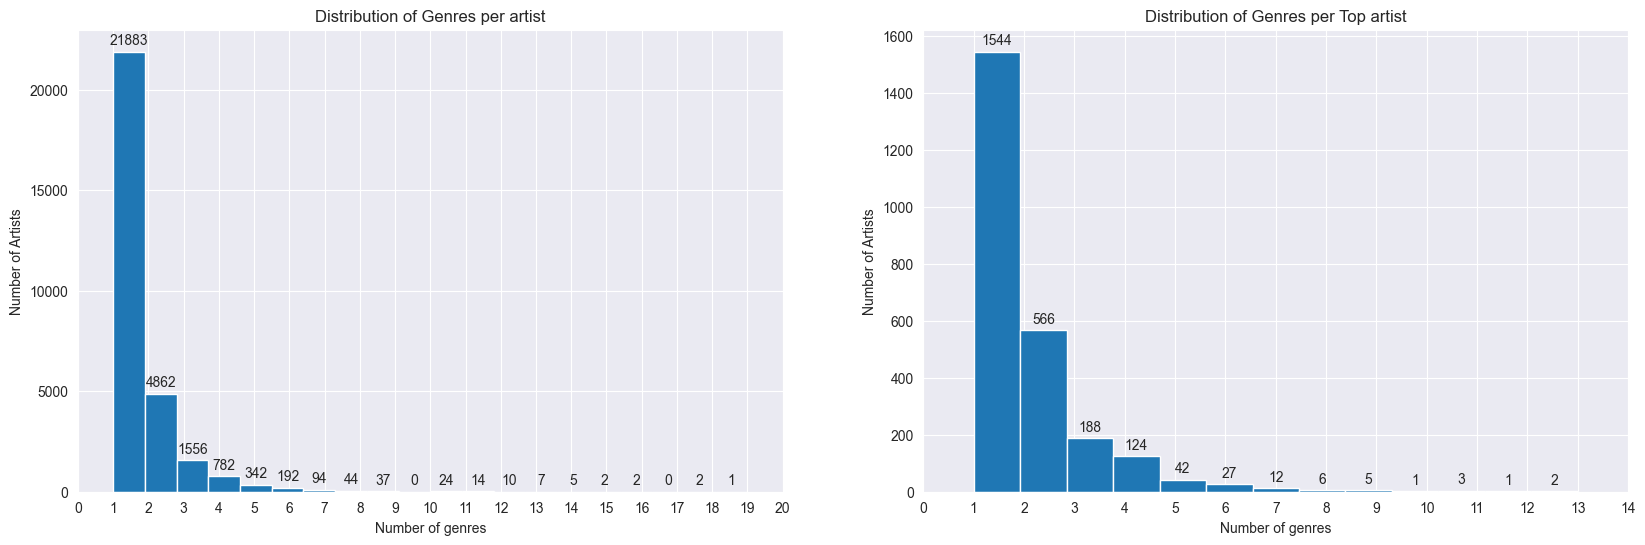

In [50]:
# Plot distributiono of genres per artists and top artists
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.set_style("darkgrid")
axes[0].hist(artist_genre_count, bins=20)
axes[0].set_title("Distribution of Genres per artist")
axes[0].set_xlabel("Number of genres")
axes[0].set_ylabel("Number of Artists")
axes[0].bar_label(axes[0].containers[0], padding=3)
axes[0].set_xticks(np.arange(0, 21, 1))

axes[1].hist(top_artists_genre_count, bins=13)
axes[1].set_title("Distribution of Genres per Top artist")
axes[1].set_xlabel("Number of genres")
axes[1].set_ylabel("Number of Artists")
axes[1].bar_label(axes[1].containers[0], padding=3)
axes[1].set_xticks(np.arange(0, 15, 1))

plt.show()

In [51]:
artists_more_than_4_genres = artist_genre_count[artist_genre_count >= 4].index.tolist()
df_more_than_4_genres = copy_df[copy_df["artists"].isin(artists_more_than_4_genres)]

diverse_artists = df_more_than_4_genres.groupby("artists")["popularity"].mean()

artists_less_than_4_genres = artist_genre_count[artist_genre_count < 4].index.tolist()
df_less_than_4_genres = copy_df[copy_df["artists"].isin(artists_less_than_4_genres)]

less_diverse_artists = df_less_than_4_genres.groupby("artists")["popularity"].mean()

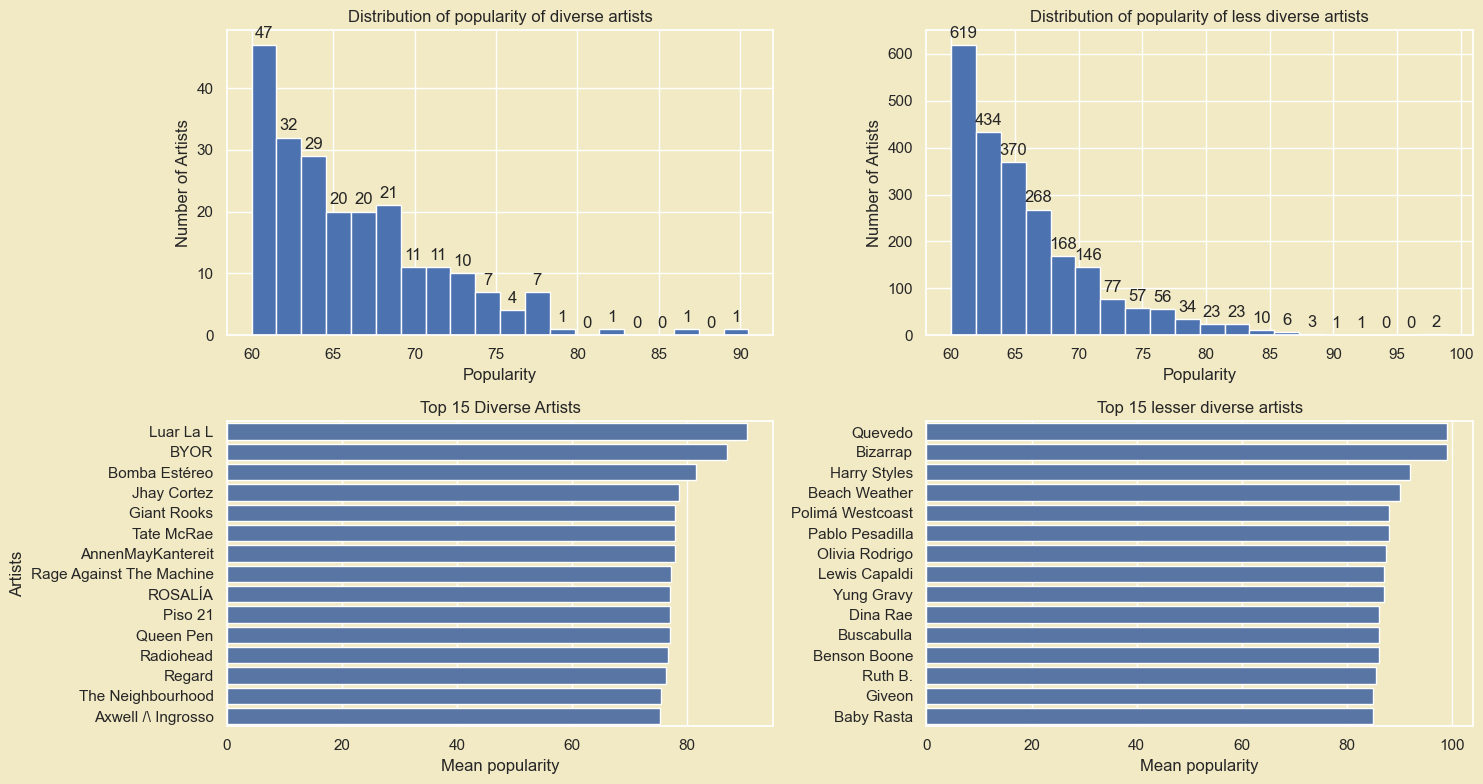

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.set(rc={"axes.facecolor": "#F2EAC5", "figure.facecolor": "#F2EAC5"})

axes[0, 0].hist(diverse_artists, bins=20)
axes[0, 0].set_title("Distribution of popularity of diverse artists")
axes[0, 0].set_xlabel("Popularity")
axes[0, 0].set_ylabel("Number of Artists")
axes[0, 0].bar_label(axes[0, 0].containers[0], padding=3)

axes[0, 1].hist(less_diverse_artists, bins=20)
axes[0, 1].set_title("Distribution of popularity of less diverse artists")
axes[0, 1].set_xlabel("Popularity")
axes[0, 1].set_ylabel("Number of Artists")
axes[0, 1].bar_label(axes[0, 1].containers[0], padding=3)

sns.barplot(
    x=diverse_artists.sort_values(ascending=False).head(15).values,
    y=diverse_artists.sort_values(ascending=False).head(15).index,
    ax=axes[1, 0],
)
axes[1, 0].set_title("Top 15 Diverse Artists")
axes[1, 0].set_xlabel("Mean popularity")
axes[1, 0].set_ylabel("Artists")


sns.barplot(
    x=less_diverse_artists.sort_values(ascending=False).head(15).values,
    y=less_diverse_artists.sort_values(ascending=False).head(15).index,
    ax=axes[1, 1],
)
axes[1, 1].set_title("Top 15 lesser diverse artists")
axes[1, 1].set_xlabel("Mean popularity")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

# Song recommendation system


## Preprocessing

In [57]:
df = df.drop(["time_signature", "key"], axis=1)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [58]:
# drop duplicates
df.drop_duplicates(subset=["track_id"], inplace=True)
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [62]:
# Normalising the data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

numerical_cols = df.select_dtypes(include=np.number).columns
data_norm = pd.DataFrame(
    scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols,
    index=df["track_id"],
)

In [68]:
trackNameListened = "Knockin' On Heaven's Door"
track_id = df[(df["track_name"] == trackNameListened)][["track_id"]]
track_id = track_id.values[0][0]

target_track = list(data_norm.loc[track_id])

In [70]:
data_norm.loc[track_id]

popularity          0.730000
duration_ms         0.027023
danceability        0.520812
energy              0.396000
loudness            0.674583
mode                1.000000
speechiness         0.030984
acousticness        0.252008
instrumentalness    0.177000
liveness            0.110000
valence             0.230151
tempo               0.576106
Name: 6HSXNV0b4M4cLJ7ljgVVeh, dtype: float64

In [74]:
# Euclidean distance calculation
data_result = pd.DataFrame()
data_result["euclidean"] = [
    distance.euclidean(obj, target_track) for index, obj in data_norm.iterrows()
]
data_result["track_id"] = data_norm.index

In [83]:
data_result

,euclidean,track_id
0,1.218631,5SuOikwiRyPMVoIQDJUgSV
1,0.811383,4qPNDBW1i3p13qLCt0Ki3A
2,0.389055,1iJBSr7s7jYXzM8EGcbK5b
3,0.828436,6lfxq3CG4xtTiEg7opyCyx
4,0.342059,5vjLSffimiIP26QG5WcN2K
...,...,...
89735,1.086790,2C3TZjDRiAzdyViavDJ217
89736,1.658893,1hIz5L4IB9hN3WRYPOCGPw
89737,1.401133,6x8ZfSoqDjuNa5SVP5QjvX
89738,0.480502,2e6sXL2bYv4bSz6VTdnfLs


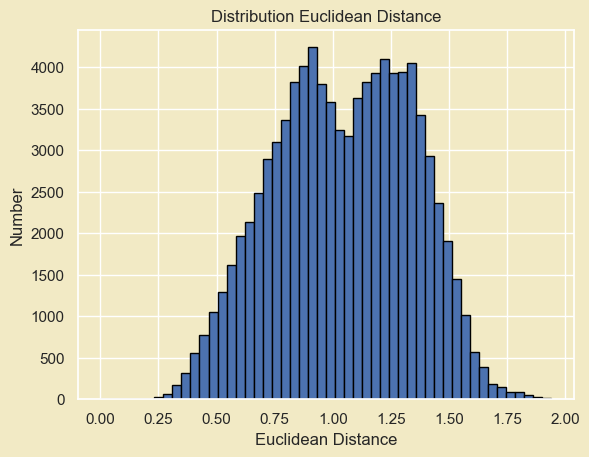

In [77]:
plt.hist(data_result["euclidean"], bins=50, edgecolor="black")

plt.xlabel("Euclidean Distance")
plt.ylabel("Number")
plt.title("Distribution Euclidean Distance")

plt.show()

## Get recommended tracks 

In [84]:
data_rec = data_result.sort_values(by=["euclidean"]).iloc[:6]

In [88]:
data_init = df.set_index(df.loc[:, "track_id"])
track_list = pd.DataFrame()

for i in list(data_rec.loc[:, "track_id"]):
    if i in list(df.loc[:, "track_id"]):
        track_info = data_init.loc[[i], ["track_name", "artists"]]
        track_list = pd.concat([track_list, track_info], ignore_index=True)

In [90]:
recommended = track_list.values.tolist()
print(
    f"""You've just listened:  \n \t - {recommended[0][0]} - {recommended[0][1]} 
Now you may listen : 
\n \t - '{recommended[1][0]} - {recommended[1][1]}'
Or any of:
\n \t - '{recommended[2][0]} - {recommended[2][1]}' 
\n \t - '{recommended[3][0]} - {recommended[3][1]}'
\n \t - '{recommended[4][0]} - {recommended[4][1]}'
\n \t - '{recommended[5][0]} - {recommended[5][1]}'  """
)

You've just listened:  
 	 - Knockin' On Heaven's Door - Bob Dylan 
Now you may listen : 

 	 - 'we fell in love in october - girl in red'
Or any of:

 	 - 'Shine - Collective Soul' 

 	 - 'Yellow Ledbetter - Pearl Jam'

 	 - 'Seasons - Chris Cornell'

 	 - 'Amanda - Boston'  
